In [ ]:
import json
from collections import Counter
import numpy as np
import pandas as pd
pd.set_option('display.max_colwidth', 1000)

In [ ]:
import spacy
from spacy.lang.en import English
tokenizer = English().tokenizer

In [ ]:
[token.text for token in tokenizer('I am a student.')]

['I', 'am', 'a', 'student', '.']

### Description

In [ ]:
with open('data/merged_preds.json', 'r', encoding='utf8') as f:
    preds = json.load(f)

In [ ]:
context = [[token.text for token in tokenizer(sample['context'].replace(" __eou__ ", ""))] for sample in preds]
context[0:2]

In [ ]:
tokenized = [sample['preds'] for sample in preds]
tokenized = [{algo: [token.text for token in tokenizer(sample[algo])] for algo in sample} for sample in tokenized]

In [ ]:
intersect = list()

for ctx, sample in zip(context, tokenized):
    ctx = set(ctx)
    
    sample_dict = {}
    
    for algo in sample:
        algo_len = len(sample[algo]) if len(sample[algo]) else 1
        resp = set(sample[algo])
        sample_dict[algo] = round(len(resp.intersection(ctx)) / algo_len, 3) * 100

    intersect.append(sample_dict)


In [ ]:
intersect_df = pd.json_normalize(intersect)
intersect_df.head(3)

,algo_convert,bert_convert_unmasker_11,bert_convert_unmasker_13,bert_convert_unmasker_31,bert_convert_unmasker_33,infilling_11,infilling_13,infilling_31,infilling_33,raw_convert,raw_tfidf,roberta_convert_unmasker_11,roberta_convert_unmasker_13,roberta_convert_unmasker_31,roberta_convert_unmasker_33
0,42.9,28.6,28.6,66.7,66.7,27.3,40.0,40.0,50.0,66.7,66.7,28.6,28.6,66.7,66.7
1,55.6,55.6,55.6,55.6,55.6,53.8,40.0,28.6,43.8,66.7,66.7,55.6,55.6,55.6,55.6
2,42.9,50.0,27.3,33.3,27.3,50.0,25.0,33.3,25.0,50.0,50.0,50.0,27.3,50.0,27.3


In [ ]:
intersect_df.mean()

algo_convert                   41.558375
bert_convert_unmasker_11       35.679178
bert_convert_unmasker_13       36.519017
bert_convert_unmasker_31       36.728294
bert_convert_unmasker_33       37.395659
infilling_11                   33.814867
infilling_13                   34.545870
infilling_31                   34.884575
infilling_33                   35.289762
raw_convert                    42.789781
raw_tfidf                      67.574971
roberta_convert_unmasker_11    35.466443
roberta_convert_unmasker_13    36.361852
roberta_convert_unmasker_31    36.583096
roberta_convert_unmasker_33    37.316788
dtype: float64

In [ ]:
df_token_len = pd.json_normalize([{algo: len(sample[algo]) for algo in sample} for sample in tokenized])
df_token_len.mean()

algo_convert                   10.005955
bert_convert_unmasker_11       10.106224
bert_convert_unmasker_13       10.198809
bert_convert_unmasker_31       10.371494
bert_convert_unmasker_33       10.358625
infilling_11                   11.144257
infilling_13                   11.217826
infilling_31                   11.351133
infilling_33                   11.372263
raw_convert                     8.962927
raw_tfidf                       6.566270
roberta_convert_unmasker_11    10.134652
roberta_convert_unmasker_13    10.234153
roberta_convert_unmasker_31    10.389358
roberta_convert_unmasker_33    10.383212
dtype: float64

In [ ]:
preds = [sample['preds'] for sample in preds]

In [ ]:
preds = [{algo: sample[algo].replace("  ", " ") for algo in sample} for sample in preds]

In [ ]:
preds[0]

{'algo_convert': 'i generally like to wear hair.',
 'bert_convert_unmasker_11': 'i generally like to wear black.',
 'bert_convert_unmasker_13': 'i generally like to wear black.',
 'bert_convert_unmasker_31': 'how about you do style?',
 'bert_convert_unmasker_33': 'how about you do style?',
 'infilling_11': 'i generally like to wear flats, but dread mondays.',
 'infilling_13': 'i generally like to wear my hair black today.',
 'infilling_31': 'whatever kind of hair i would like i buy.',
 'infilling_33': 'whatever style, i buy.',
 'raw_convert': 'how about you hair style?',
 'raw_tfidf': 'how about you hair style?',
 'roberta_convert_unmasker_11': 'i generally like to wear red.',
 'roberta_convert_unmasker_13': 'i generally like to wear red.',
 'roberta_convert_unmasker_31': 'how about you like style?',
 'roberta_convert_unmasker_33': 'how about you like style?'}

In [ ]:
df = pd.json_normalize(preds)

In [ ]:
df.nunique().sort_values(ascending=False)

infilling_11                   4887
infilling_31                   4860
infilling_13                   4859
infilling_33                   4798
algo_convert                   4400
roberta_convert_unmasker_11    4345
bert_convert_unmasker_11       4284
roberta_convert_unmasker_13    4281
roberta_convert_unmasker_31    4209
bert_convert_unmasker_13       4180
roberta_convert_unmasker_33    4161
bert_convert_unmasker_31       4120
bert_convert_unmasker_33       4032
raw_convert                    3122
raw_tfidf                      2996
dtype: int64

In [ ]:
df.nunique(axis=1).sort_values(ascending=False)

4404    15
4410    15
3003    15
4382    15
5116    15
        ..
825      3
1090     3
1265     3
2723     2
4326     2
Length: 5206, dtype: int64

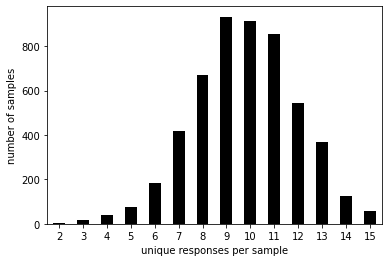

In [ ]:
fig = df.nunique(axis=1).sort_values(ascending=True).value_counts().sort_index().plot(
    kind='bar', colormap='gray', rot=0, ylabel="number of samples", xlabel='unique responses per sample').get_figure()

fig.savefig('img/intersecting responses.png')

In [ ]:
preds[4326]

{'context': "that is really crazy. but I guess a child maybe should not watch a movie like that __eou__ Very true. let alone act in one. It's no wonder these Horror movies are so successful with high calorie burning and inspiring tales from literature authors like edgar allen poe. bram stoker and mary shelley making it known that horror films have been around for more than a century! __eou__ there are just so many aspects to horror movies. science. supernatural. fantasy. sci fi. it is such an expansive genre",
 'preds': {'algo_convert': 'i enjoy sci-fi.',
  'bert_convert_unmasker_11': 'i enjoy sci-fi.',
  'bert_convert_unmasker_13': 'i enjoy sci-fi.',
  'bert_convert_unmasker_31': 'i enjoy sci-fi.',
  'bert_convert_unmasker_33': 'i enjoy sci-fi.',
  'infilling_11': 'i enjoy sci-fi.',
  'infilling_13': 'i enjoy sci-fi.',
  'infilling_31': 'i enjoy sci-fi.',
  'infilling_33': 'i enjoy sci-fi.',
  'raw_convert': 'i do love horror',
  'raw_tfidf': 'i do love horror',
  'roberta_convert_unm

### DialogRPT Evaluation

In [ ]:
import operator

def idx2labels(values, labels) -> dict:
    output =  {labels[i]: value for i, value in enumerate(values)}
    output = pd.DataFrame(output.items(), columns=['algo', 'votes']).sort_values(ascending=False, by='votes')
    return output

def voting(arr: np.ndarray, labels) -> tuple:
    rows = np.array(range(arr.shape[0]), dtype=np.intp)
    sorted_args = np.argsort(arr, axis=-1)

    best = sorted_args[:,-1]
    best = np.array(best, dtype=np.intp)[:, None]
    best = arr[rows[:, np.newaxis], best]
    best = 1 * (arr == best).sum(axis=0)
    best = idx2labels(best, labels)

    worst = sorted_args[:,0]
    worst = np.array(worst, dtype=np.intp)[:, None]
    worst = arr[rows[:, np.newaxis], worst]
    worst = 1 * (arr == worst).sum(axis=0)
    worst = idx2labels(worst, labels)
    
    return best, worst

In [ ]:
best_algos = dict()
worst_algos = dict()

In [ ]:
with open('data/scored_merged_preds_rpt.json', 'r', encoding='utf8') as f:
    scores = json.load(f)

In [ ]:
scores[0]['scores']['updown']

{'algo_convert': 0.318,
 'bert_convert_unmasker_11': 0.299,
 'bert_convert_unmasker_13': 0.299,
 'bert_convert_unmasker_31': 0.254,
 'bert_convert_unmasker_33': 0.254,
 'infilling_11': 0.215,
 'infilling_13': 0.35,
 'infilling_31': 0.316,
 'infilling_33': 0.389,
 'raw_convert': 0.221,
 'raw_tfidf': 0.221,
 'roberta_convert_unmasker_11': 0.269,
 'roberta_convert_unmasker_13': 0.269,
 'roberta_convert_unmasker_31': 0.241,
 'roberta_convert_unmasker_33': 0.241}

In [ ]:
scores_2 = list()

for sample in scores:
    new_sample = sample
    new_scores = dict() 
    test_algos = ['raw_convert', 'raw_tfidf', 'bert_convert_unmasker_11']
    # unique = len(set(sample['preds'].values()))
    
    for metric, values in sample['scores'].items():
        new_scores[metric] = {}
        
        new_scores[metric] = {algo: values[algo] for algo in values if algo in test_algos}
        
    new_sample['scores'] = new_scores
    scores_2.append(new_sample)

In [ ]:
scores_only = [sample['scores'] for sample in scores_2]

In [ ]:
df = pd.json_normalize(scores_only)
df.columns

Index(['updown.bert_convert_unmasker_11', 'updown.raw_convert',
       'updown.raw_tfidf', 'depth.bert_convert_unmasker_11',
       'depth.raw_convert', 'depth.raw_tfidf',
       'width.bert_convert_unmasker_11', 'width.raw_convert',
       'width.raw_tfidf', 'human-vs-rand.bert_convert_unmasker_11',
       'human-vs-rand.raw_convert', 'human-vs-rand.raw_tfidf',
       'human-vs-machine.bert_convert_unmasker_11',
       'human-vs-machine.raw_convert', 'human-vs-machine.raw_tfidf'],
      dtype='object')

In [ ]:
algo_names = [name[7:] for name in df.columns[0:3]]
algo_names

['bert_convert_unmasker_11', 'raw_convert', 'raw_tfidf']

In [ ]:
df.iloc[:, :3].mean().round(4).sort_values(ascending=False)

updown.raw_tfidf                   0.3720
updown.bert_convert_unmasker_11    0.3687
updown.raw_convert                 0.3639
dtype: float64

In [ ]:
best, worst = voting(df.iloc[:, :3].values, algo_names)

In [ ]:
best.head(3), worst.head(3)

(                       algo  votes
 2                 raw_tfidf   1980
 0  bert_convert_unmasker_11   1750
 1               raw_convert   1740,
                        algo  votes
 1               raw_convert   1937
 0  bert_convert_unmasker_11   1811
 2                 raw_tfidf   1653)

In [ ]:
best_algos['updown'] = best.values
worst_algos['updown'] = worst.values

In [ ]:
best_algos

{'updown': array([['raw_tfidf', 1980],
        ['bert_convert_unmasker_11', 1750],
        ['raw_convert', 1740]], dtype=object)}

In [ ]:
df.iloc[:, 3:6].mean().round(4).sort_values(ascending=False)

depth.bert_convert_unmasker_11    0.5370
depth.raw_convert                 0.5367
depth.raw_tfidf                   0.5092
dtype: float64

In [ ]:
best, worst = voting(df.iloc[:, 3:6].values, algo_names)

In [ ]:
best.head(3), worst.head(3)

(                       algo  votes
 1               raw_convert   2069
 0  bert_convert_unmasker_11   1857
 2                 raw_tfidf   1543,
                        algo  votes
 2                 raw_tfidf   2143
 0  bert_convert_unmasker_11   1622
 1               raw_convert   1618)

In [ ]:
best_algos['depth'] = best.values
worst_algos['depth'] = worst.values

In [ ]:
df.iloc[:, 6:9].mean().round(4).sort_values(ascending=False)

width.bert_convert_unmasker_11    0.6260
width.raw_convert                 0.6184
width.raw_tfidf                   0.5946
dtype: float64

In [ ]:
best, worst = voting(df.iloc[:, 6:9].values, algo_names)

In [ ]:
best.head(3), worst.head(3)

(                       algo  votes
 1               raw_convert   2027
 0  bert_convert_unmasker_11   1907
 2                 raw_tfidf   1515,
                        algo  votes
 2                 raw_tfidf   2175
 1               raw_convert   1703
 0  bert_convert_unmasker_11   1525)

In [ ]:
best_algos['width'] = best.values
worst_algos['width'] = worst.values

In [ ]:
df.iloc[:, 9:12].mean().round(4).sort_values(ascending=False)

human-vs-rand.raw_convert                 0.9427
human-vs-rand.bert_convert_unmasker_11    0.8634
human-vs-rand.raw_tfidf                   0.8238
dtype: float64

In [ ]:
best, worst = voting(df.iloc[:, 9:12].values, algo_names)

In [ ]:
best.head(3), worst.head(3)

(                       algo  votes
 1               raw_convert   3047
 0  bert_convert_unmasker_11   1690
 2                 raw_tfidf   1568,
                        algo  votes
 2                 raw_tfidf   2539
 0  bert_convert_unmasker_11   2170
 1               raw_convert    911)

In [ ]:
best_algos['human-vs-rand'] = best.values
worst_algos['human-vs-rand'] = worst.values

In [ ]:
df.iloc[:, 12:15].mean().round(4).sort_values(ascending=False)

human-vs-machine.bert_convert_unmasker_11    0.9905
human-vs-machine.raw_convert                 0.9869
human-vs-machine.raw_tfidf                   0.9799
dtype: float64

In [ ]:
best, worst = voting(df.iloc[:, 12:75].values, algo_names)

In [ ]:
best.head(3), worst.head(3)

(                       algo  votes
 0  bert_convert_unmasker_11   4047
 1               raw_convert   3586
 2                 raw_tfidf   2508,
                        algo  votes
 2                 raw_tfidf   4077
 1               raw_convert   2783
 0  bert_convert_unmasker_11   2435)

In [ ]:
best_algos['human-vs-machine'] = best.values
worst_algos['human-vs-machine'] = worst.values

In [ ]:
best_algos

{'updown': array([['raw_tfidf', 1980],
        ['bert_convert_unmasker_11', 1750],
        ['raw_convert', 1740]], dtype=object),
 'depth': array([['raw_convert', 2069],
        ['bert_convert_unmasker_11', 1857],
        ['raw_tfidf', 1543]], dtype=object),
 'width': array([['raw_convert', 2027],
        ['bert_convert_unmasker_11', 1907],
        ['raw_tfidf', 1515]], dtype=object),
 'human-vs-rand': array([['raw_convert', 3047],
        ['bert_convert_unmasker_11', 1690],
        ['raw_tfidf', 1568]], dtype=object),
 'human-vs-machine': array([['bert_convert_unmasker_11', 4047],
        ['raw_convert', 3586],
        ['raw_tfidf', 2508]], dtype=object)}

### Evaluator

In [ ]:
import operator

def idx2labels(values, labels) -> dict:
    output =  {labels[i]: value for i, value in enumerate(values)}
    output = pd.DataFrame(output.items(), columns=['algo', 'votes']).sort_values(ascending=False, by='votes')
    return output

def voting(arr: np.ndarray, labels) -> tuple:
    rows = np.array(range(arr.shape[0]), dtype=np.intp)
    sorted_args = np.argsort(arr, axis=-1)

    best = sorted_args[:,-1]
    best = np.array(best, dtype=np.intp)[:, None]
    best = arr[rows[:, np.newaxis], best]
    best = 1 * (arr == best).sum(axis=0)
    best = idx2labels(best, labels)

    worst = sorted_args[:,0]
    worst = np.array(worst, dtype=np.intp)[:, None]
    worst = arr[rows[:, np.newaxis], worst]
    worst = 1 * (arr == worst).sum(axis=0)
    worst = idx2labels(worst, labels)
    
    return best, worst

In [ ]:
with open('data/scored_merged_preds_dp.json', 'r', encoding='utf8') as f:
    scores = json.load(f)

In [ ]:
scores[0]['scores']['algo_convert']

{'isResponseComprehensible': 0.38,
 'isResponseErroneous': 0.696,
 'isResponseInteresting': 0.47,
 'isResponseOnTopic': 0.064,
 'responseEngagesUser': 0.564}

In [ ]:
scores_only = [sample['scores'] for sample in scores]

In [ ]:
scores = list()

for sample in scores_only:
    sample_new = dict()
    algos=list(sample.keys())
    metrics = list(sample[algos[0]].keys())
    tested_algos = ['raw_convert', 'raw_tfidf', 'bert_convert_unmasker_11']
    
    for metric in metrics:
        sample_new[metric] = {}
        for algo in algos:
            if algo not in test_algos:
                continue
            sample_new[metric][algo] = sample[algo][metric]
            
    scores.append(sample_new)

In [ ]:
df = pd.json_normalize(scores)

In [ ]:
df.columns

Index(['isResponseComprehensible.bert_convert_unmasker_11',
       'isResponseComprehensible.raw_convert',
       'isResponseComprehensible.raw_tfidf',
       'isResponseErroneous.bert_convert_unmasker_11',
       'isResponseErroneous.raw_convert', 'isResponseErroneous.raw_tfidf',
       'isResponseInteresting.bert_convert_unmasker_11',
       'isResponseInteresting.raw_convert', 'isResponseInteresting.raw_tfidf',
       'isResponseOnTopic.bert_convert_unmasker_11',
       'isResponseOnTopic.raw_convert', 'isResponseOnTopic.raw_tfidf',
       'responseEngagesUser.bert_convert_unmasker_11',
       'responseEngagesUser.raw_convert', 'responseEngagesUser.raw_tfidf'],
      dtype='object')

In [ ]:
algo_names = [label[25:] for label in df.columns[0:3]]

In [ ]:
algo_names

['bert_convert_unmasker_11', 'raw_convert', 'raw_tfidf']

In [ ]:
df.iloc[:, :3].mean().round(4).sort_values(ascending=False)

isResponseComprehensible.bert_convert_unmasker_11    0.3630
isResponseComprehensible.raw_convert                 0.3592
isResponseComprehensible.raw_tfidf                   0.3460
dtype: float64

In [ ]:
best, worst = voting(df.iloc[:, :3].values, algo_names)
best.head(3), worst.head(3)

(                       algo  votes
 0  bert_convert_unmasker_11   2340
 1               raw_convert   2014
 2                 raw_tfidf   1576,
                        algo  votes
 2                 raw_tfidf   2434
 1               raw_convert   1826
 0  bert_convert_unmasker_11   1676)

In [ ]:
best_algos['isComprehensible'] = best.values
worst_algos['isComprehensible'] = worst.values

In [ ]:
df.iloc[:, 3:6].mean().round(4).sort_values(ascending=False)

isResponseErroneous.raw_tfidf                   0.6324
isResponseErroneous.bert_convert_unmasker_11    0.6150
isResponseErroneous.raw_convert                 0.6109
dtype: float64

In [ ]:
best, worst = voting(df.iloc[:, 3:6].values, algo_names)
best.head(3), worst.head(3)

(                       algo  votes
 2                 raw_tfidf   2304
 0  bert_convert_unmasker_11   1864
 1               raw_convert   1748,
                        algo  votes
 1               raw_convert   2158
 0  bert_convert_unmasker_11   2141
 2                 raw_tfidf   1617)

In [ ]:
best_algos['isErroneous'] = best.values
worst_algos['isErroneous'] = worst.values

In [ ]:
df.iloc[:, 6:9].mean().round(4).sort_values(ascending=False)

isResponseInteresting.bert_convert_unmasker_11    0.4632
isResponseInteresting.raw_convert                 0.4594
isResponseInteresting.raw_tfidf                   0.4373
dtype: float64

In [ ]:
best, worst = voting(df.iloc[:, 6:9].values, algo_names)
best.head(3), worst.head(3)

(                       algo  votes
 0  bert_convert_unmasker_11   2327
 1               raw_convert   2122
 2                 raw_tfidf   1450,
                        algo  votes
 2                 raw_tfidf   2601
 1               raw_convert   1721
 0  bert_convert_unmasker_11   1630)

In [ ]:
best_algos['isInteresting'] = best.values
worst_algos['isInteresting'] = worst.values

In [ ]:
df.iloc[:, 9:12].mean().round(4).sort_values(ascending=False)

isResponseOnTopic.bert_convert_unmasker_11    0.1548
isResponseOnTopic.raw_tfidf                   0.1515
isResponseOnTopic.raw_convert                 0.1474
dtype: float64

In [ ]:
best, worst = voting(df.iloc[:, 9:12].values, algo_names)
best.head(3), worst.head(3)

(                       algo  votes
 0  bert_convert_unmasker_11   2268
 1               raw_convert   1908
 2                 raw_tfidf   1874,
                        algo  votes
 2                 raw_tfidf   2219
 1               raw_convert   2106
 0  bert_convert_unmasker_11   1794)

In [ ]:
best_algos['isOnTopic'] = best.values
worst_algos['isOnTopic'] = worst.values

In [ ]:
df.iloc[:, 12:15].mean().round(4).sort_values(ascending=False)

responseEngagesUser.bert_convert_unmasker_11    0.6657
responseEngagesUser.raw_convert                 0.6633
responseEngagesUser.raw_tfidf                   0.6470
dtype: float64

In [ ]:
best, worst = voting(df.iloc[:, 12:15].values, algo_names)
best.head(3), worst.head(3)

(                       algo  votes
 1               raw_convert   2113
 0  bert_convert_unmasker_11   2100
 2                 raw_tfidf   1773,
                        algo  votes
 2                 raw_tfidf   2230
 1               raw_convert   1866
 0  bert_convert_unmasker_11   1849)

In [ ]:
best_algos['EngagesUser'] = best.values
worst_algos['EngagesUser'] = worst.values

In [ ]:
best_algos

In [ ]:
sorted_best_algos = dict()

tmp = best_algos

for metric in tmp:    
    sorted_best_algos[metric] = tmp[metric][tmp[metric][:, 0].argsort()]

In [ ]:
sorted_best_algos

In [ ]:
for metric in best_algos:
    print(best_algos[metric])    
    print(sorted_best_algos[metric])
    print('\n')

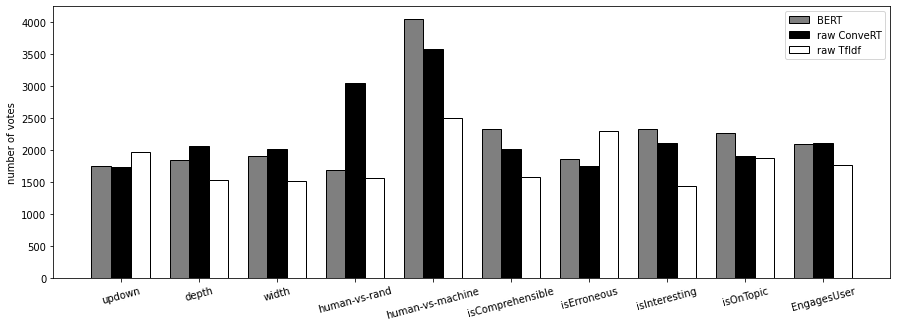

In [ ]:
import matplotlib.pyplot as plt

metrics = list(sorted_best_algos.keys())

ind = np.arange(len(metrics)) 
width = 0.25

colors = ['tab:gray', 'k', 'w']

vals = [sorted_best_algos[metric][:,1].squeeze() for metric in metrics]

bert_vals = [val[0] for val in vals]
convert_vals = [val[1] for val in vals]
tfidf_vals = [val[2] for val in vals]

plt.figure(figsize=(15,5))
bar1 = plt.bar(ind, bert_vals, width, color = 'tab:gray', edgecolor = "k")
bar2 = plt.bar(ind+width, convert_vals, width, color='k', edgecolor = "k")
bar3 = plt.bar(ind+width*2, tfidf_vals, width, color = 'w', edgecolor = "k")
  
# plt.xlabel("metrics")
plt.ylabel('number of votes')
# plt.title("Sample-based Evaluation")
  
plt.xticks(ind+width,metrics, rotation=15)
plt.legend( (bar1, bar2, bar3), ('BERT', 'raw ConveRT', 'raw TfIdf') )
plt.set_cmap("Greys")

plt.savefig('img/votes.png')
plt.show()